In this notebook, we'll be working on a classic problem: solving the harmonic oscillator equation. 

# Introduction: the harmonic oscillator

$$
m \ddot{x} + k x = f \sin(\omega t)
$$

$$
\ddot{x} + \omega_0^2 x = f' \sin(\omega t)
$$

where $\omega_0^2 = \frac{k}{m}$. The above equation is the harmonic oscillator model equation with a source term.

Since we have a second derivative in time of the position $x$, we need to specify two things: the initial position and the initial speed (i.e. time derivative) of the oscillator. These are denoted as: 

$$
\begin{align}
x(t = 0) = x_0 \\
\dot{x}(t=0) = \dot{x}_0
\end{align}
$$

In this notebook, we will explore three options for solving the evolution problem of this harmonic oscillator:

- solve it analytically using `sympy`
- solve it numerically by implementing a finite difference scheme from scratch
- solve it numerically with `scipy` builtin tools

# Analytical solution with sympy

To solve this equation analytically, we will use sympy. Sympy provides an ordinary differential equation (ODE) module for these problems: <http://docs.sympy.org/dev/modules/solvers/ode.html>.

First, we define our symbols and function:

In [10]:
import sympy

sympy.init_printing()

m, k, x_0, xdot_0, omega_0, t, omega = sympy.symbols('m, k, x_0, xdot_0, omega_0, t, omega')
x = sympy.Function('x')

We can then use `dsolve`, which deals with differential equations:

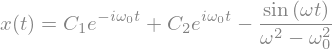

In [11]:
sol = sympy.dsolve(sympy.Derivative(x(t), t, 2) + omega_0**2 * x(t) - sympy.sin(omega * t))
sol

And define our initial conditions and solve for them:

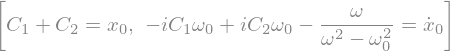

In [12]:
ics = [sympy.Eq(sol.args[1].subs(t, 0), x_0), sympy.Eq(sol.args[1].diff(t).subs(t, 0), xdot_0)]
ics

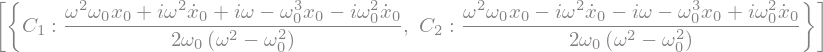

In [13]:
solved_ics = sympy.solve(ics)
solved_ics

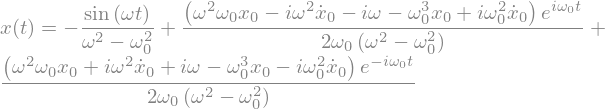

In [14]:
full_sol = sol.subs(solved_ics[0])
full_sol

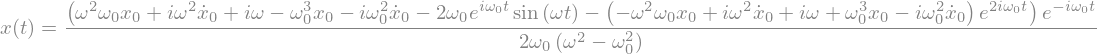

In [29]:
sympy.simplify(full_sol)

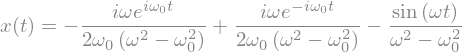

In [105]:
full_sol.subs({x_0:0, xdot_0:0})

The above equation was obtained by sympy and contains the solution to our problem. We can notice that it features complex exponentials, hinting at the oscillatory functions we already expect from our physical knowledge of harmonic oscillator.

Let's plot the solution for two different initial condition sets: 

- case 1 : initial position is non-zero and initial velocity is zero 
- case 2 : initial position is zero and initial velocity is non-zero

We'll use a value of $\omega_0$ equal to 2 (it's often helpful to not choose a value of 1 for constants to spot mistakes early).

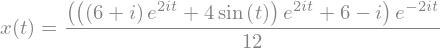

In [33]:
case1 = sympy.simplify(full_sol.subs({x_0:1, xdot_0:0, omega_0:2, omega:1}))
case1

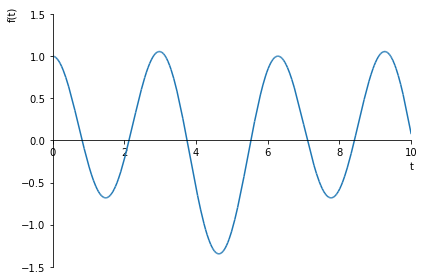

In [34]:
sympy.plot(case1.rhs, ylim=(-1.5, 1.5), xlim=(0, 10))

Let's look at our second solution.

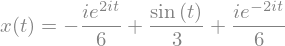

In [35]:
case2 = sympy.simplify(full_sol.subs({x_0:0, xdot_0:1, omega_0:2, omega:1}))
case2

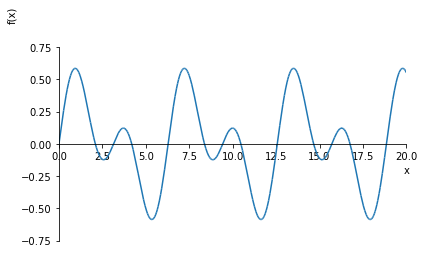

In [42]:
sympy.plot((case2.rhs, (t, 0, 20)), xlim=(0, 20), ylim=(-1, 1))

What about the limit case when we hit omega_0 ?

In [101]:
case2 = sympy.simplify(full_sol.subs({x_0:0, xdot_0:1, omega_0:2, omega:2}))
case2

# Case studies 

### Going from below omega_0 to omega_0

In [91]:
cases = {}
for omega_value in [1, 1.4, 1.8, 1.9, 1.99]:
    cases[omega_value] = make_solution(omega_value)

In [97]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('bmh')

def make_plot(tmax=20):
    t_values = np.linspace(0, tmax, num=1000)
    fig, ax = plt.subplots(figsize=(15, 5))
    for omega_value, case in cases.items():
        func = sympy.lambdify(t, case.rhs, 'numpy')
        ax.plot(t_values, func(t_values).real, label=r'$\omega$: {:.2f}'.format(omega_value))
    ax.legend()

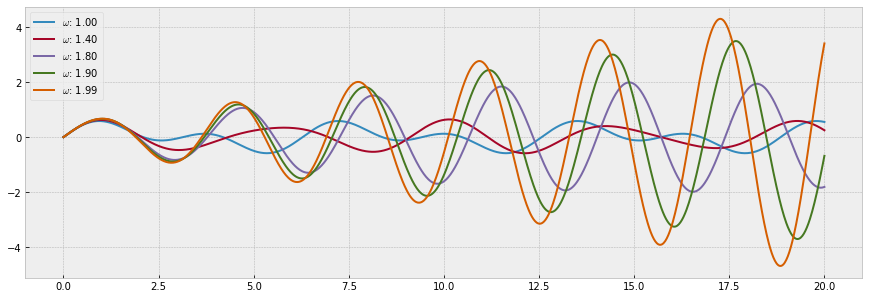

In [98]:
make_plot(tmax=20)

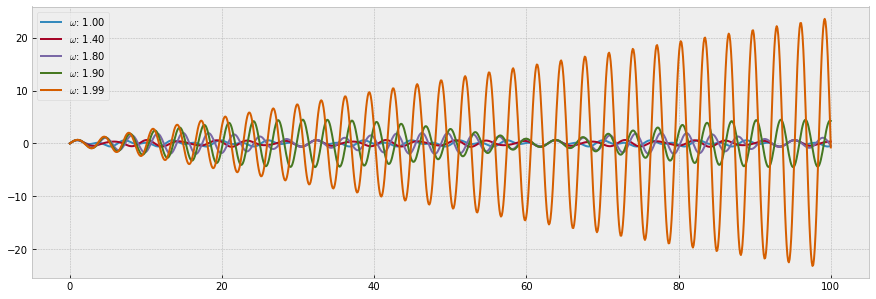

In [99]:
make_plot(tmax=100)

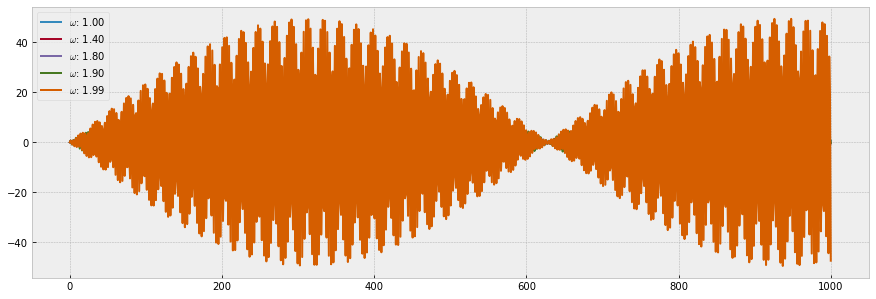

In [100]:
make_plot(tmax=1000)

# What happens after the resonance ?  

In [108]:
cases = {}
for omega_value in [4 - 1, 4 - 1.4, 4 - 1.8, 4 - 1.9, 4 - 1.99]:
    cases[omega_value] = make_solution(omega_value)

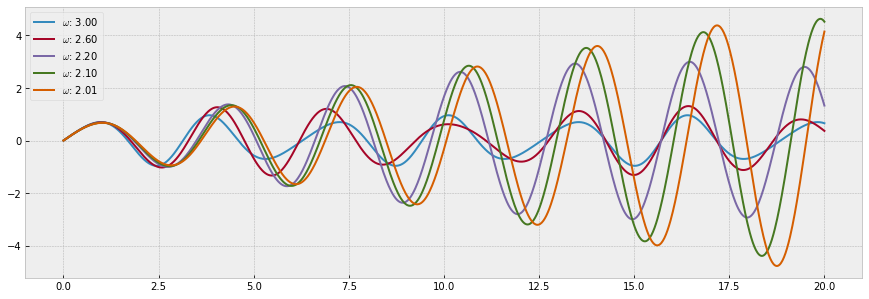

In [109]:
make_plot(tmax=20)

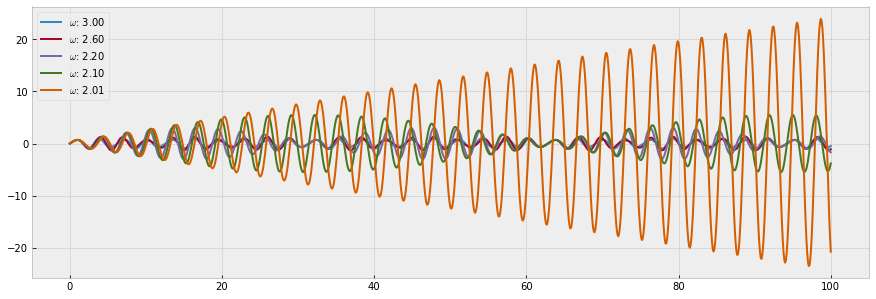

In [110]:
make_plot(tmax=100)

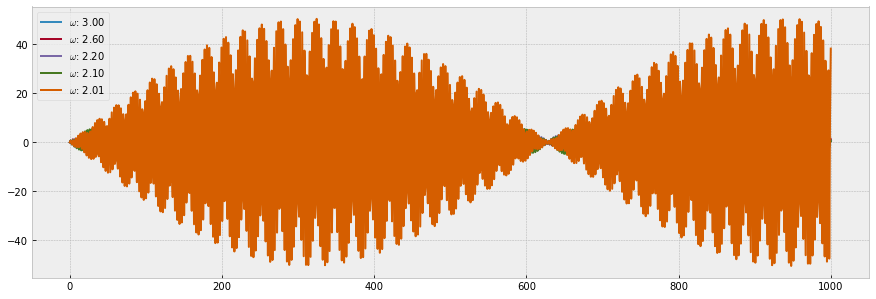

In [111]:
make_plot(tmax=1000)